In [5]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload 2

In [7]:
import circuit_simulator as cs

In [10]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
import tensornetwork as tn

Calculating overlap with $|0\rangle$ is linear

In [5]:
%timeit cs.sample_process(5)

4.33 ms ± 423 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%timeit cs.sample_process(10)

9.88 ms ± 735 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit cs.sample_process(50)

62.7 ms ± 7.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [27]:
%timeit cs.sample_process(100)

117 ms ± 11.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [28]:
%timeit cs.sample_process(500)

556 ms ± 74.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit cs.sample_process(1000)

996 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Calculating overlap with every part is quadratic (although it is possible to speed it up to $O(n \log n)$)

In [217]:
%timeit len(cs.sample_all_qubits(10))

32.1 ms ± 790 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%timeit len(cs.sample_all_qubits(20))

105 ms ± 6.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
%timeit len(cs.sample_all_qubits(40))

364 ms ± 3.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [33]:
%timeit len(cs.sample_all_qubits(80))

1.44 s ± 52.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit len(cs.sample_all_qubits(160))

5.8 s ± 303 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We can speed this up to $O(n\log n)$

In [218]:
%timeit len(cs.sample_all_qubits_faster(10))

21.5 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [36]:
%timeit len(cs.sample_all_qubits_faster(20))

48.9 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [37]:
%timeit len(cs.sample_all_qubits_faster(40))

103 ms ± 1.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [38]:
%timeit len(cs.sample_all_qubits_faster(80))

223 ms ± 4.73 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [39]:
%timeit len(cs.sample_all_qubits_faster(160))

513 ms ± 25.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
%timeit len(cs.sample_all_qubits_faster(320))

1.06 s ± 24.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit len(cs.sample_all_qubits_faster(640))

2.5 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Verifying against cirq


In [219]:
import cirq

In [220]:
simulator = cirq.Simulator()

In [226]:
n_qubits = 10

In [227]:
l = cs.sample_ladder(n_qubits)

In [228]:
lp = [cirq.ops.matrix_gates.TwoQubitMatrixGate(g)(cirq.LineQubit(p[0]), cirq.LineQubit(p[1])) for p, g in l]

In [229]:
c2 = cirq.Circuit(lp[:(n_qubits - 1)])
c2 = c2 + cirq.inverse(c2[:-1])

In [230]:
%timeit r = simulator.simulate(c2)

2.75 ms ± 77 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [231]:
r = simulator.simulate(c2)

In [232]:
def benchmark_cirq(n_qubits, r):
    probs = []
    for i in range(n_qubits):
        p = r.density_matrix_of([cirq.LineQubit(i)])[0,0]
        probs.append(p)
    return probs
def benchmark_mps(n_qubits, m):
    probs = cs.get_all_probabilities(m.copy())
    return probs
def benchmark_mps_faster(n_qubits, m):
    probs = get_all_probabilities_faster(m.copy())
    return probs

In [233]:
%timeit benchmark_cirq(n_qubits, r)

688 µs ± 7.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [234]:
benchmark_cirq(n_qubits, r)

[(0.79746825+0j),
 (0.8027406+0j),
 (0.79682654+0j),
 (0.7654194+0j),
 (0.7118679+0j),
 (0.6453194+0j),
 (0.5618453+0j),
 (0.44501093+0j),
 (0.1531996+0j),
 (0.36645272+0j)]

In [235]:
%timeit m = cs.compute_mps(n_qubits, l)

NameError: name 'compute_mps' is not defined

In [ ]:
m = compute_mps(n_qubits, l)

In [ ]:
%timeit benchmark_mps(n_qubits, m)

In [236]:
benchmark_mps(n_qubits, m)

NameError: name 'get_all_probabilities' is not defined

In [64]:
%timeit benchmark_mps_faster(n_qubits, m)

41.6 ms ± 1.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
benchmark_mps_faster(n_qubits, m)

[array(0.99247649),
 array(0.9907248),
 array(0.99054164),
 array(0.9838472),
 array(0.98095772),
 array(0.98056867),
 array(0.98591901),
 array(0.96722198),
 array(0.97002218),
 array(0.97735946),
 array(0.96683936),
 array(0.98016115),
 array(0.98623683),
 array(0.99157549),
 array(0.93440059),
 array(0.88774831),
 array(0.90086954),
 array(0.85365873),
 array(0.89262582),
 array(0.75865042),
 array(0.84935343),
 array(0.84164159),
 array(0.66229167),
 array(0.49440509),
 array(0.41580931)]

# Quick benchmark

In [86]:
# when things are not the same
ps_nosame = []
for x in tqdm(range(2000)):
    ps_nosame.append(cs.sample_all_qubits_faster(50, all_same=False))
ps_nosame = np.array(ps_nosame)

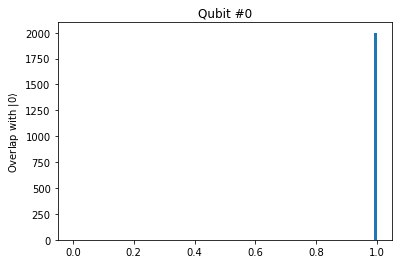

In [87]:
plt.hist(ps_nosame[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.ylabel(r"Overlap with $|0\rangle$")
plt.show()

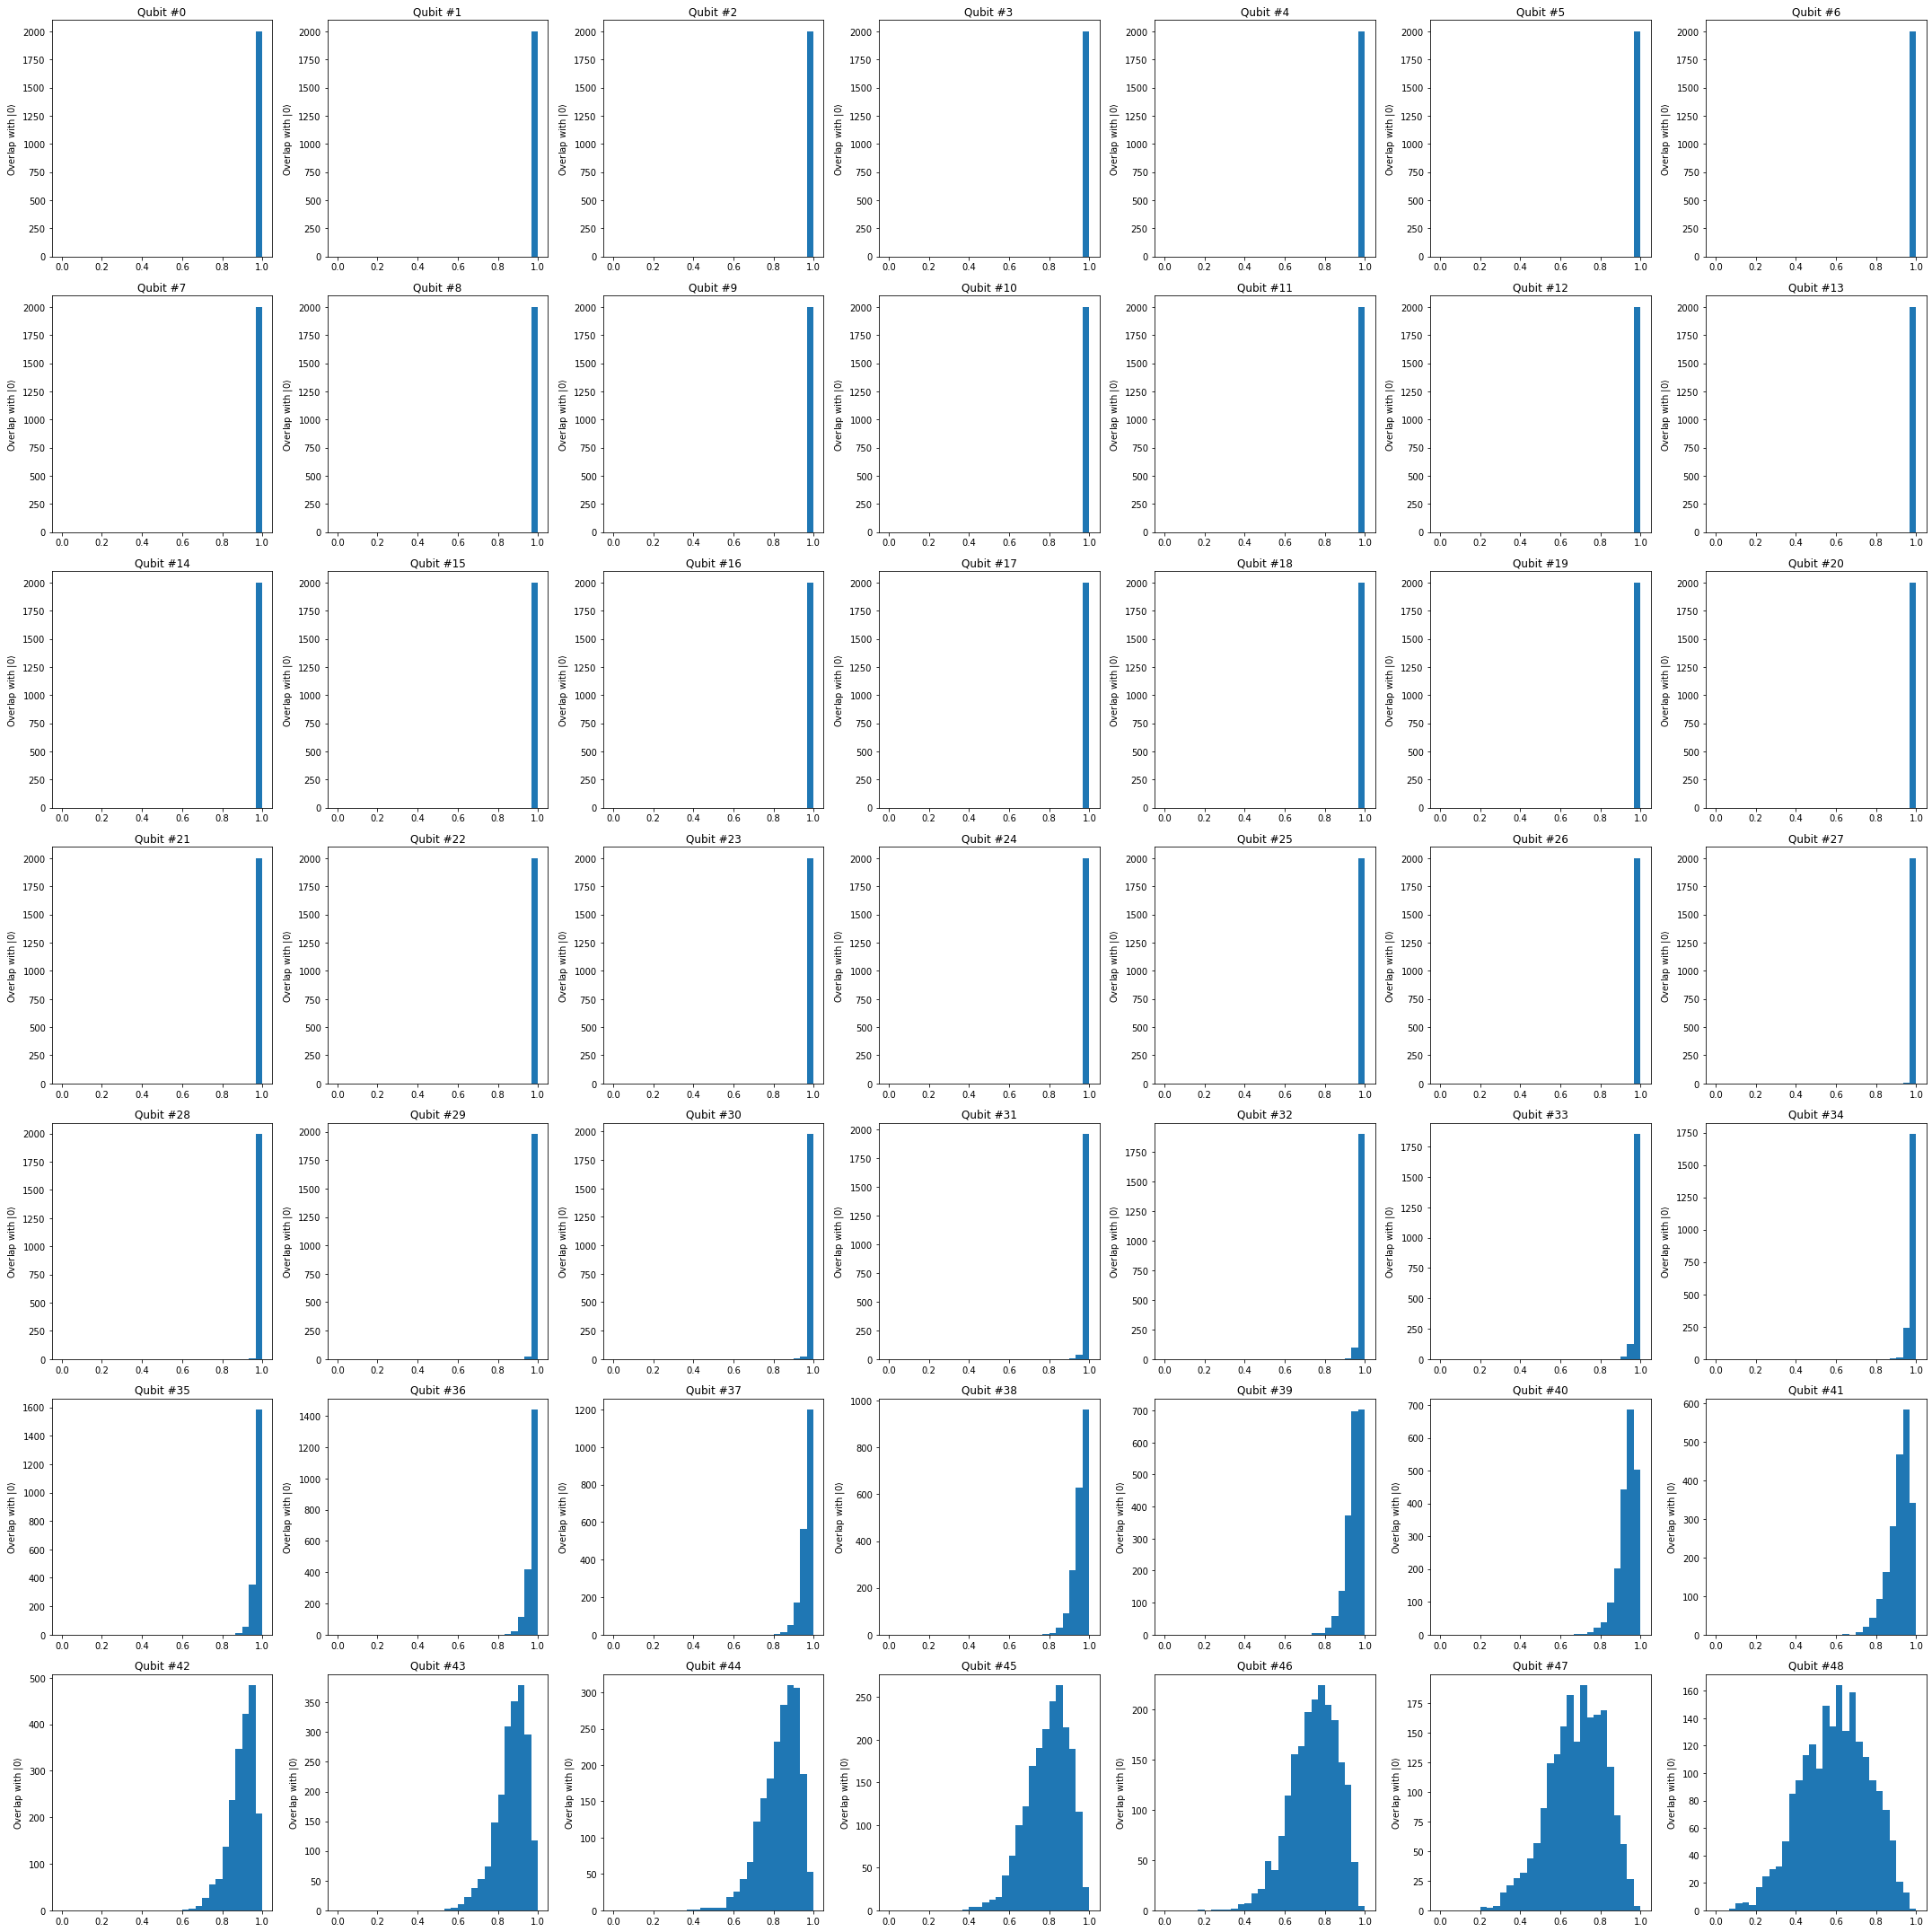

In [88]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps_nosame[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [203]:
top3 = [sample_top_k(30) for i in tqdm(range(1000))]

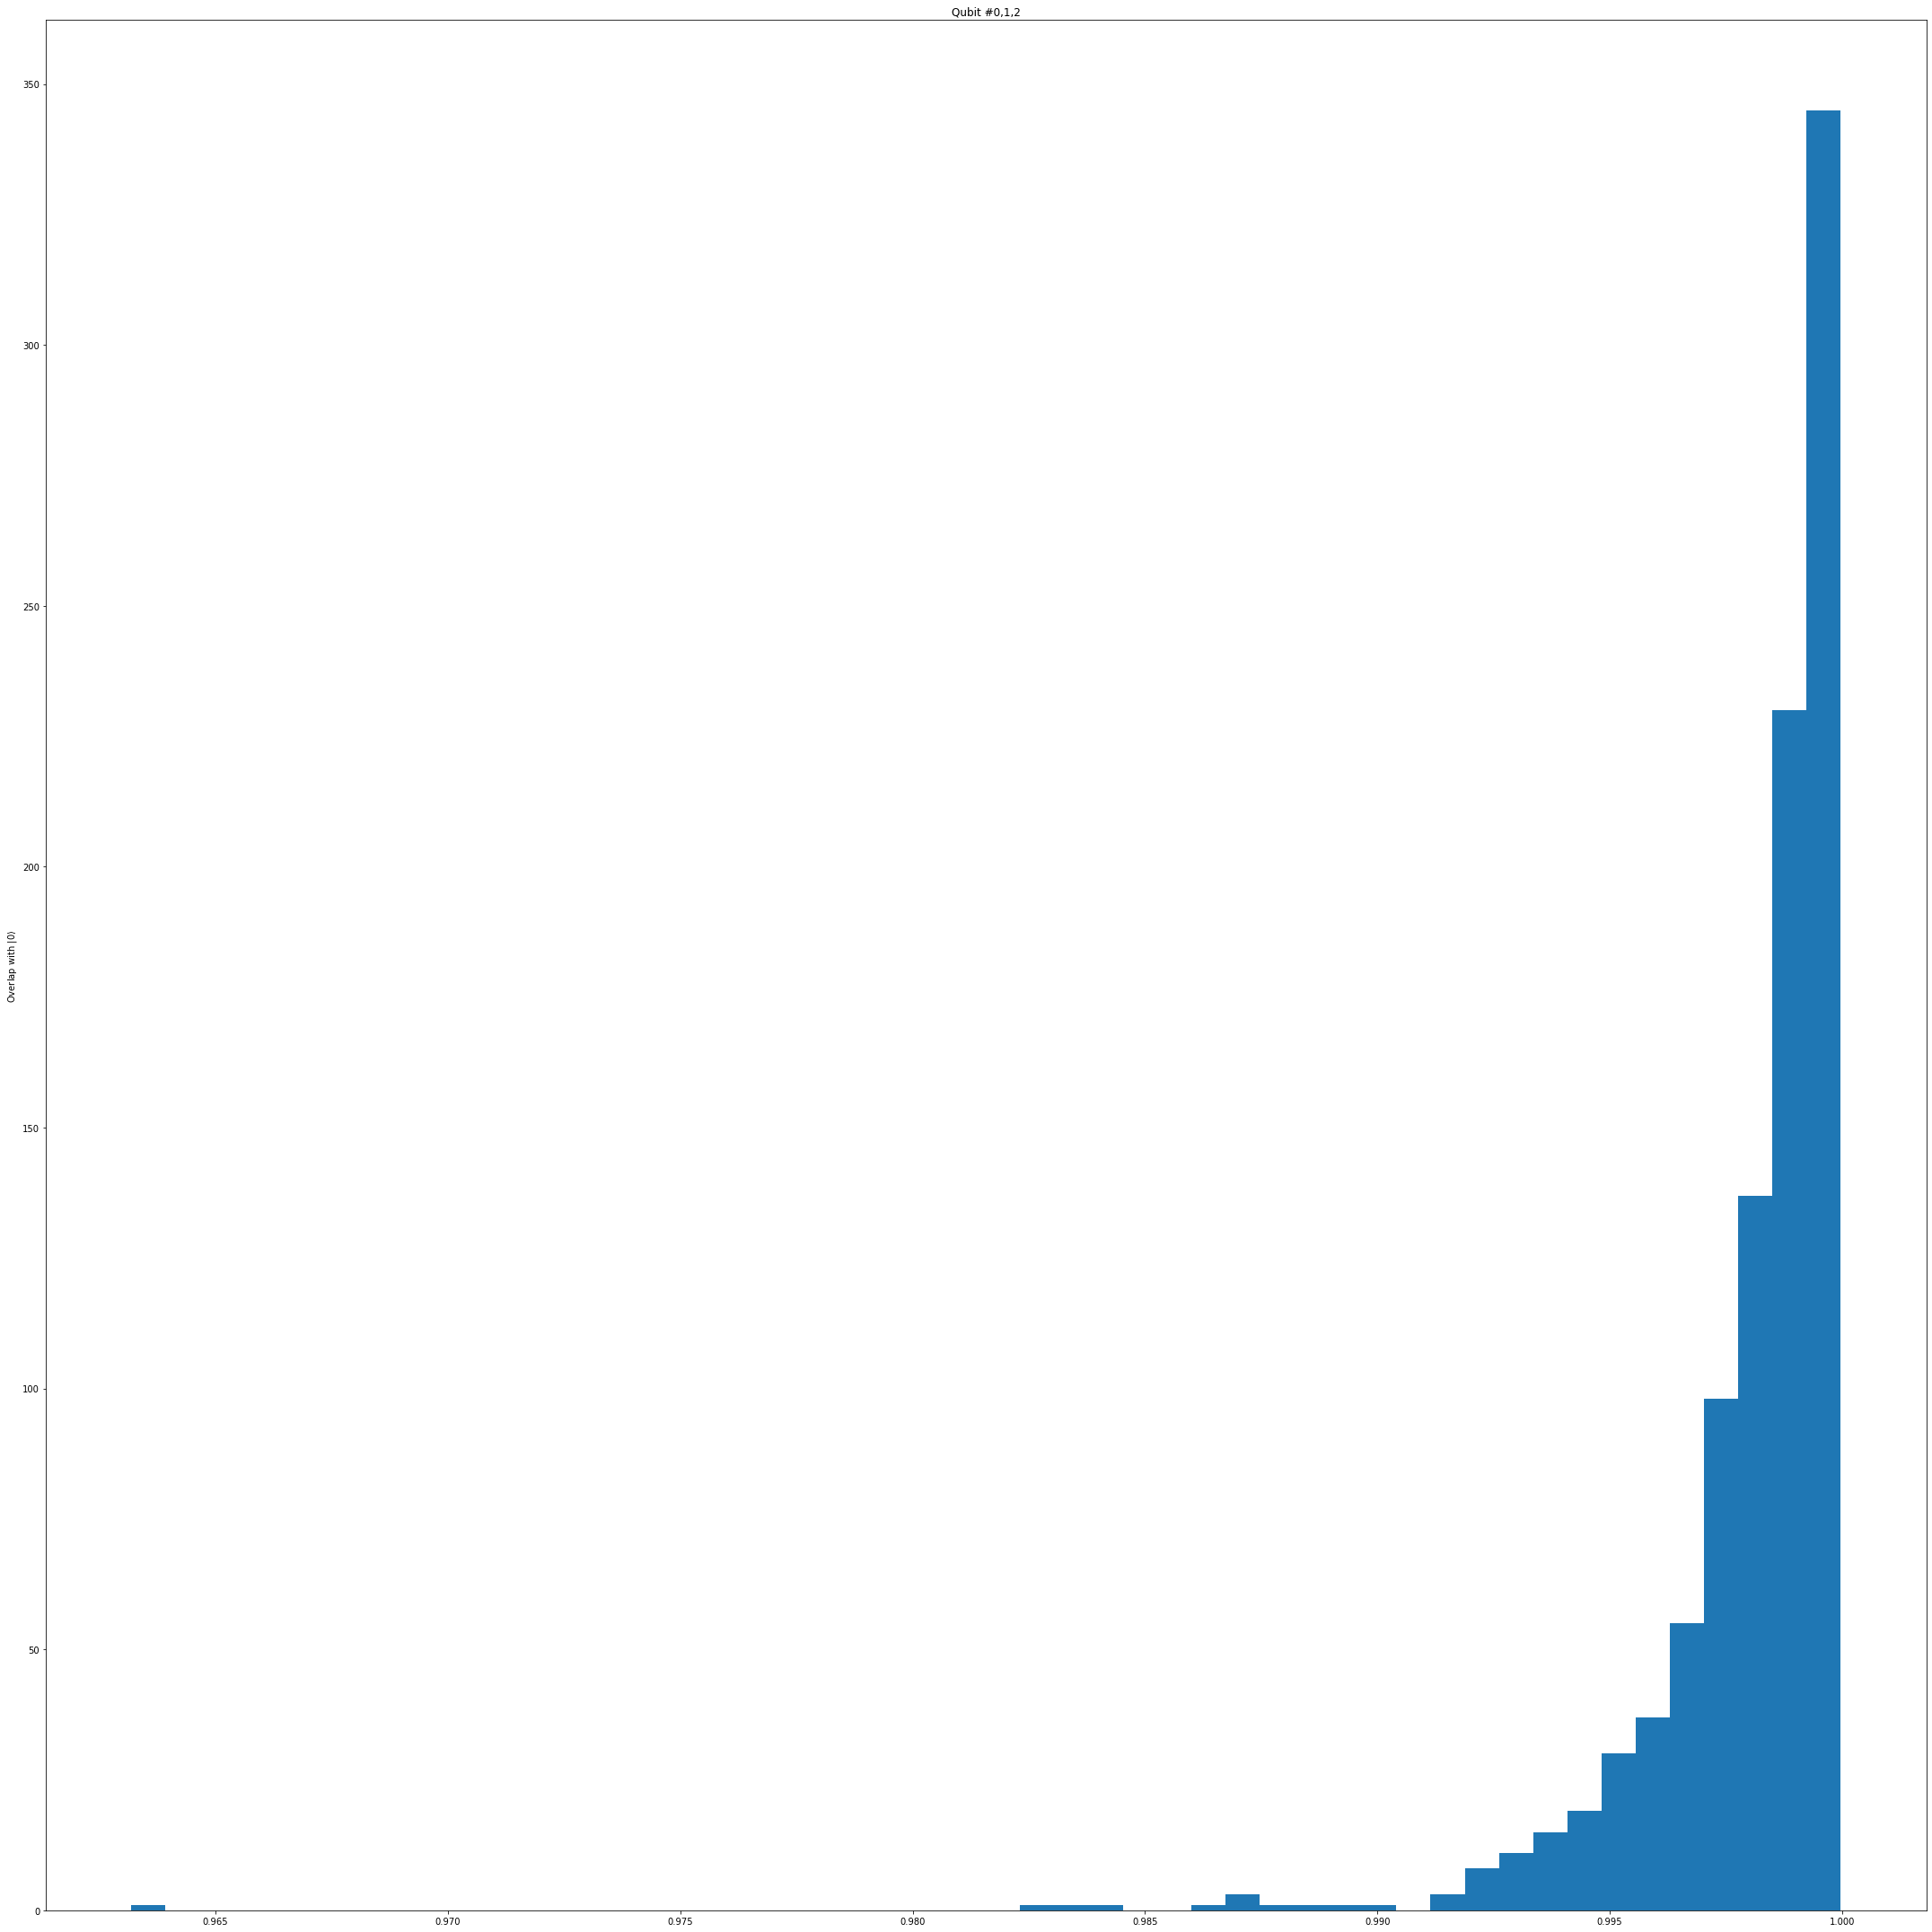

In [206]:
fig=plt.figure(figsize=(30, 30))
t = 0
ax=fig.add_subplot(1,1, 1)
ax.hist(top3, bins = 50)
ax.set_title("Qubit #0,1,2")
ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()
# Note the range

# New ladder

In [18]:
ps = []
for x in tqdm(range(200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(4,1))
ps = np.array(ps)

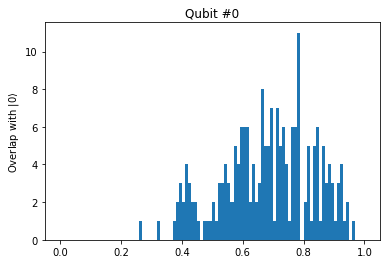

In [19]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.ylabel(r"Overlap with $|0\rangle$")
plt.show()

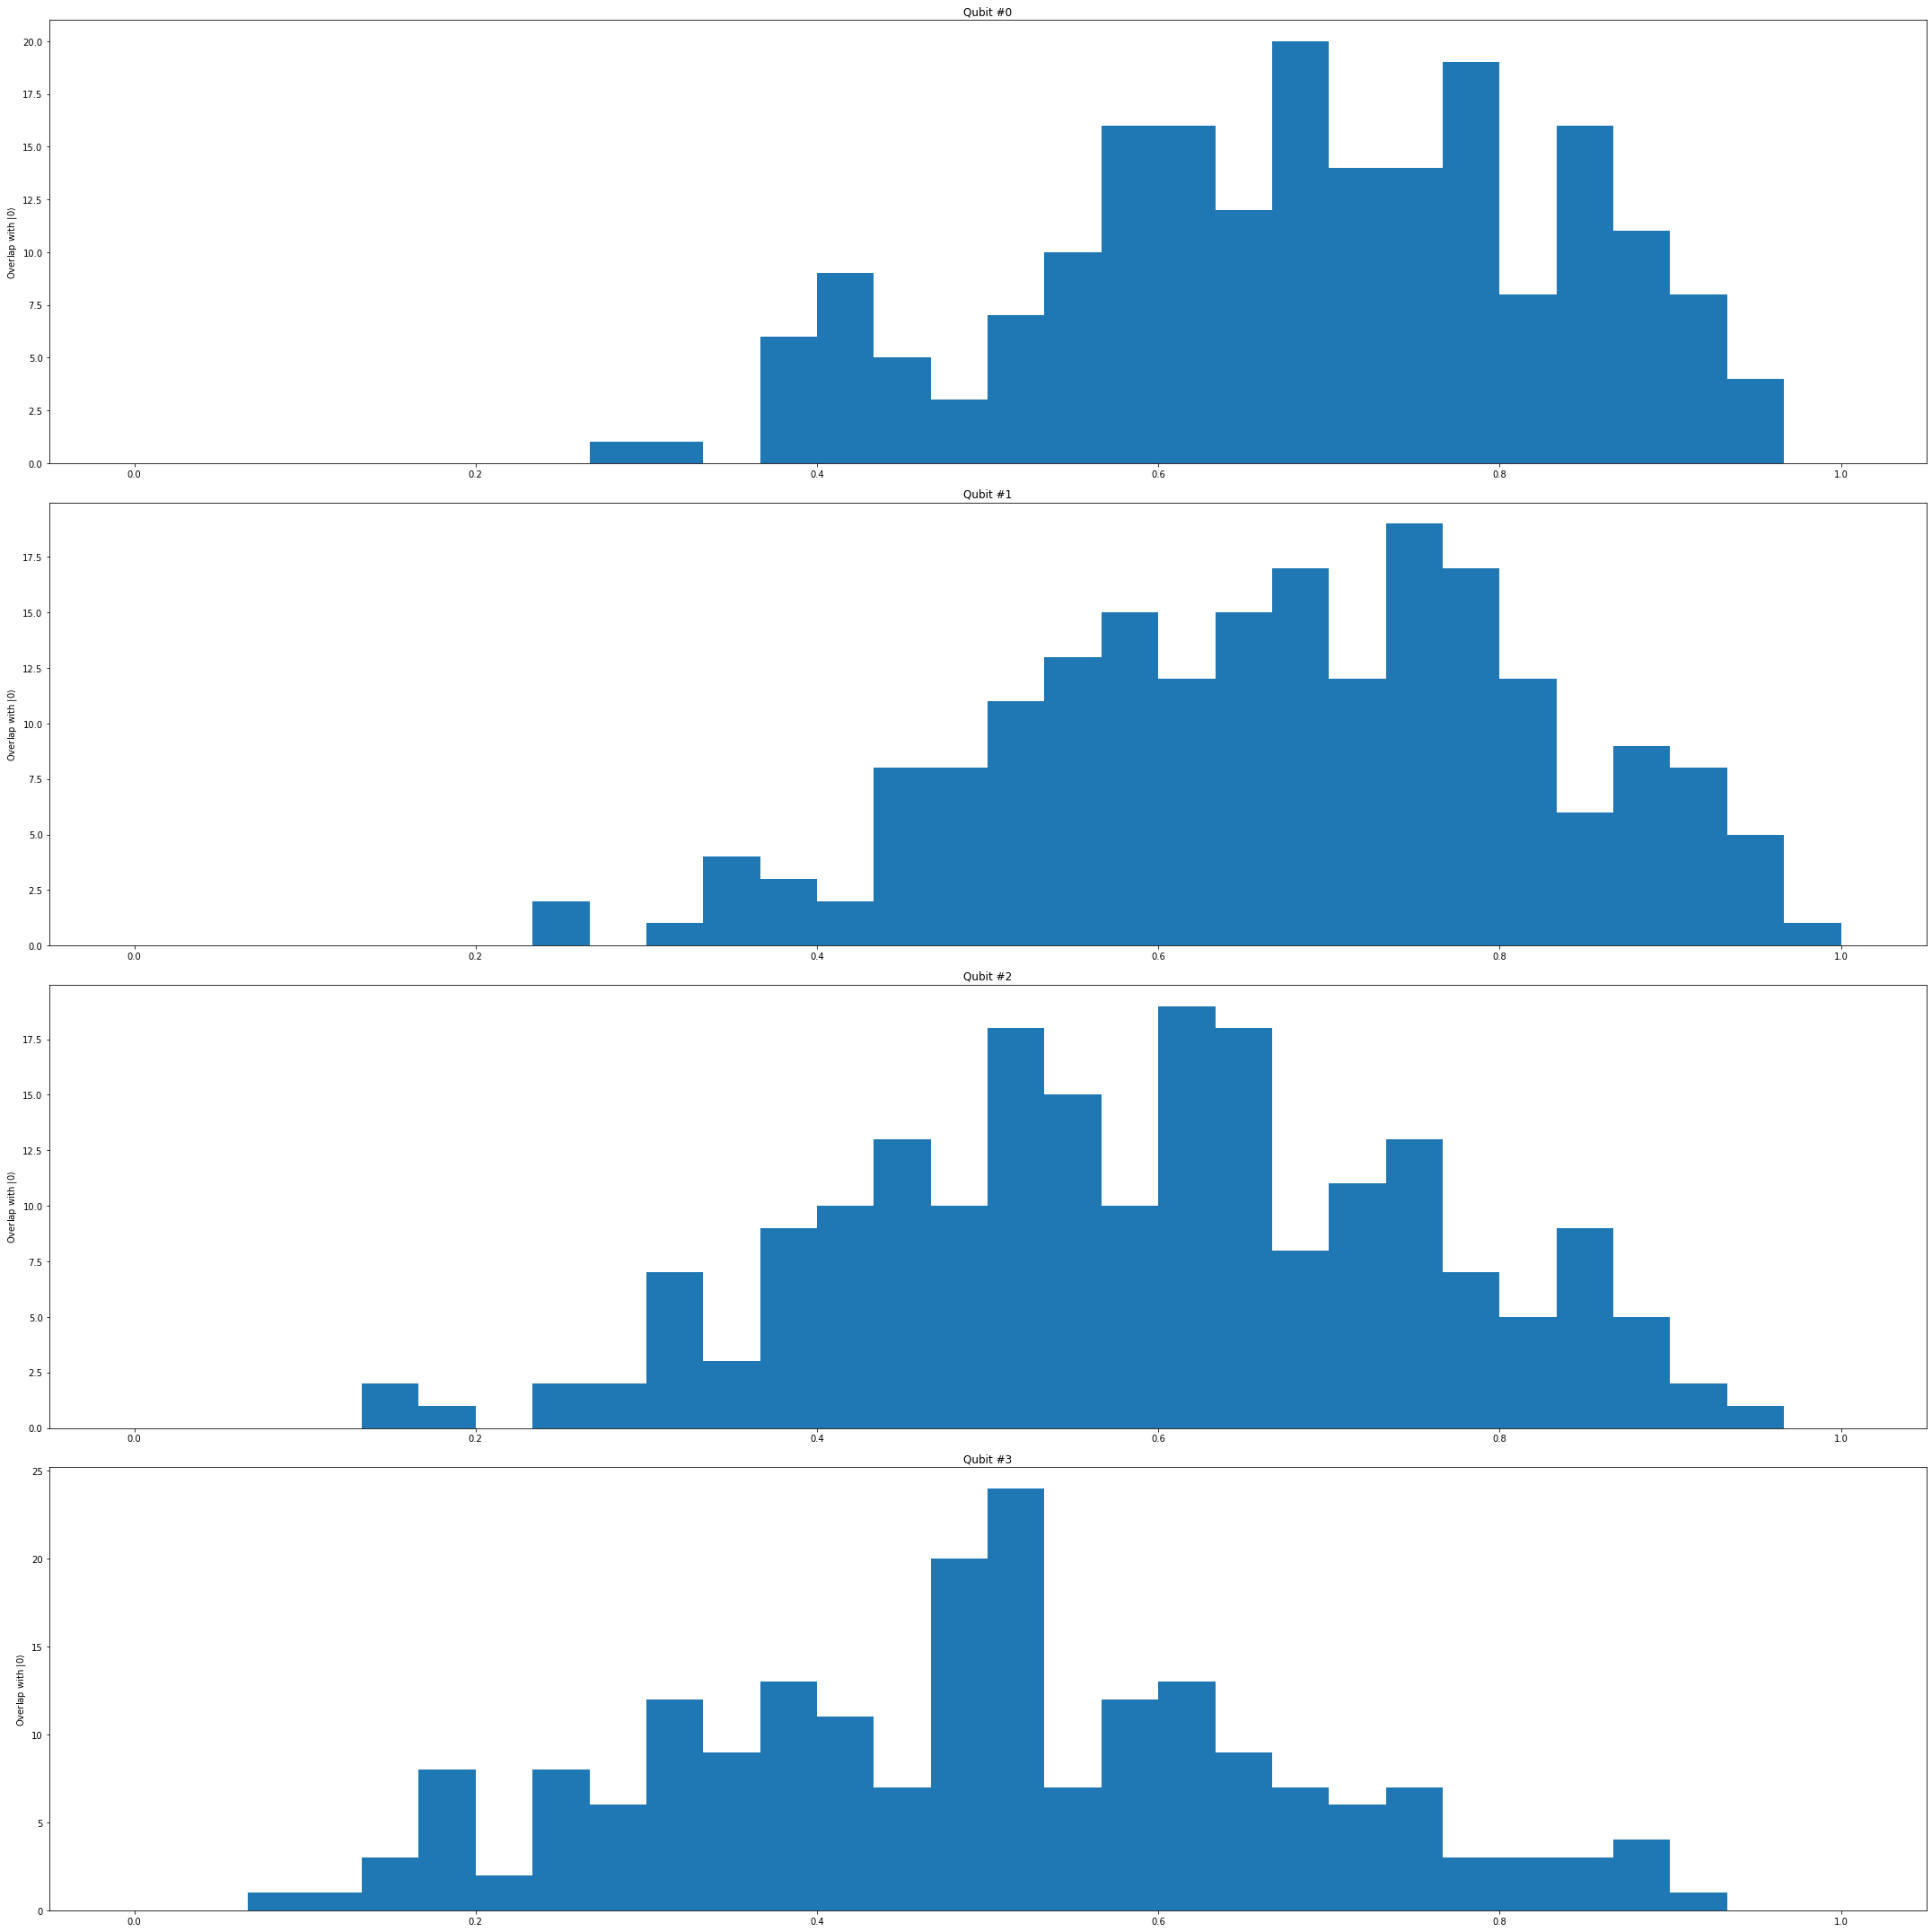

In [21]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(4):
    ax=fig.add_subplot(4,1, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [26]:
ps = []
for x in tqdm(range(200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(3*3+1,2))
ps = np.array(ps)

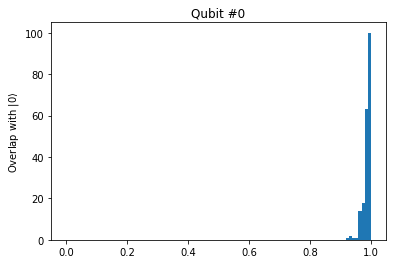

In [27]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.ylabel(r"Overlap with $|0\rangle$")
plt.show()

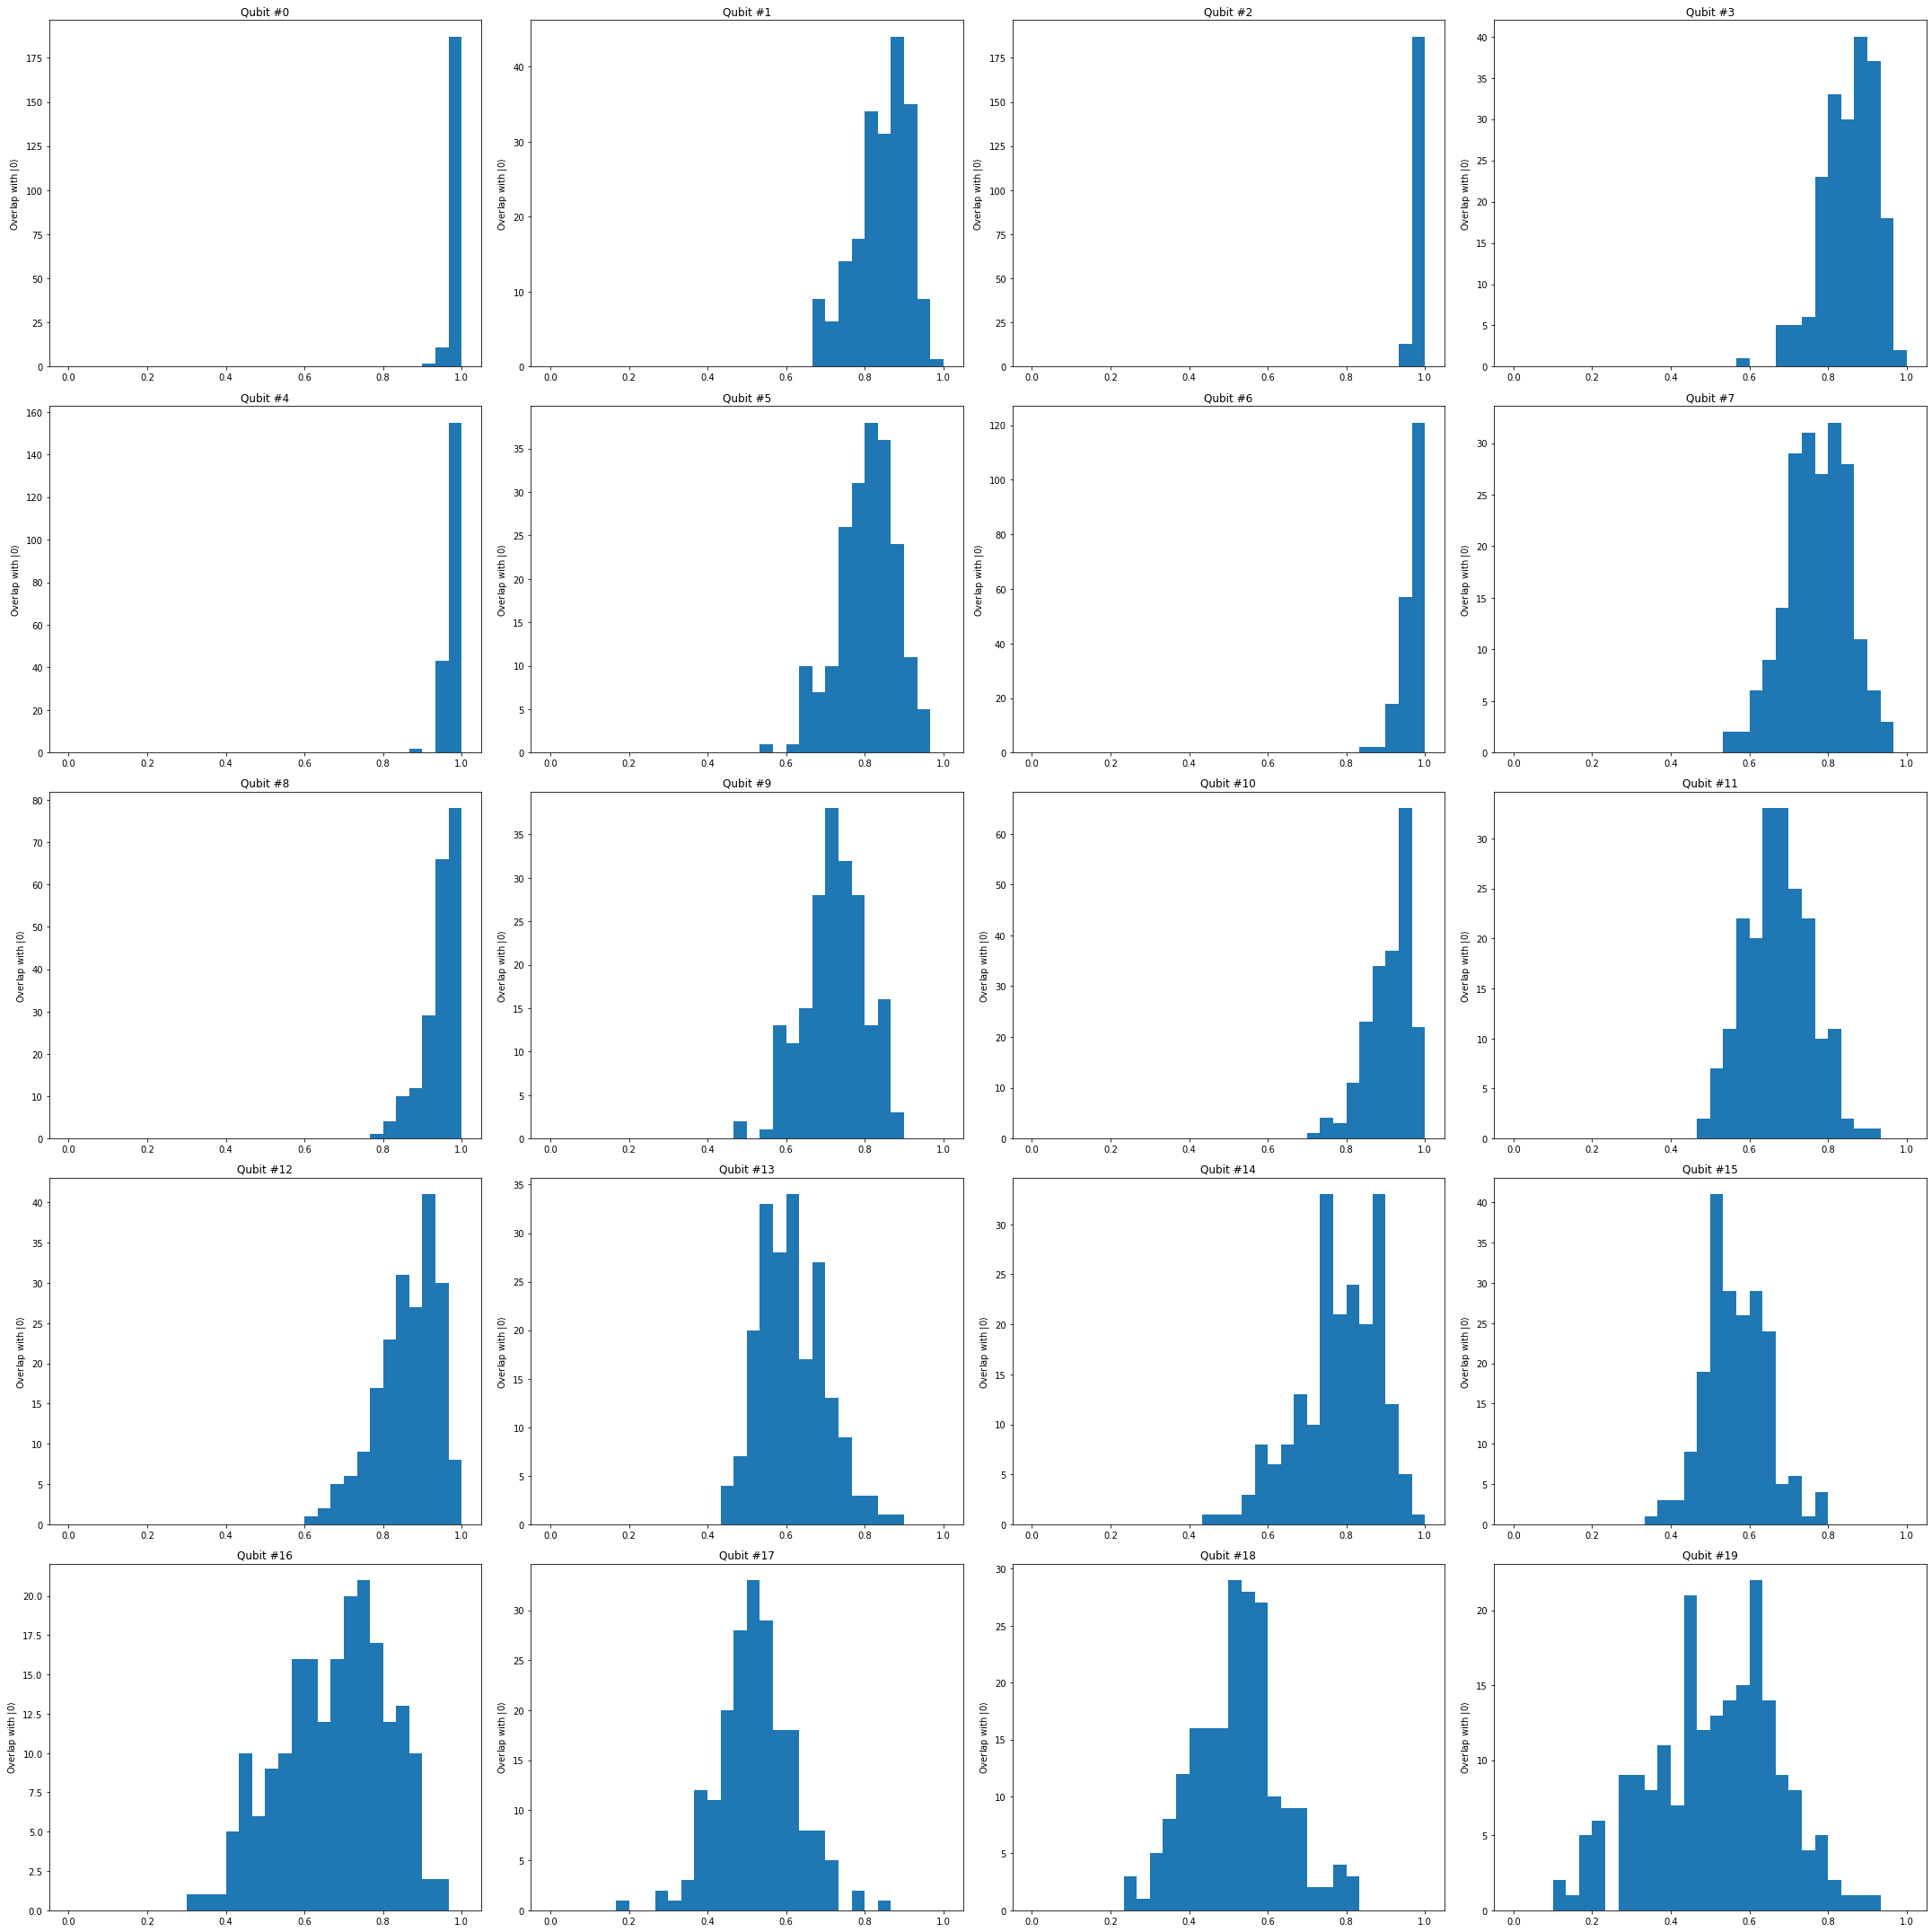

In [28]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(10*2):
    ax=fig.add_subplot(5,4, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


In [ ]:
ps = []

In [37]:
for x in tqdm(range(len(ps),200)):
    ps.append(cs.sample_better_ladder_faster_probabilities(5,3))
ps = np.array(ps)

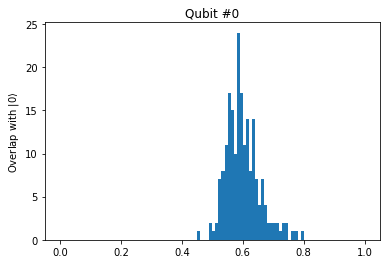

In [40]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.ylabel(r"Overlap with $|0\rangle$")
plt.show()

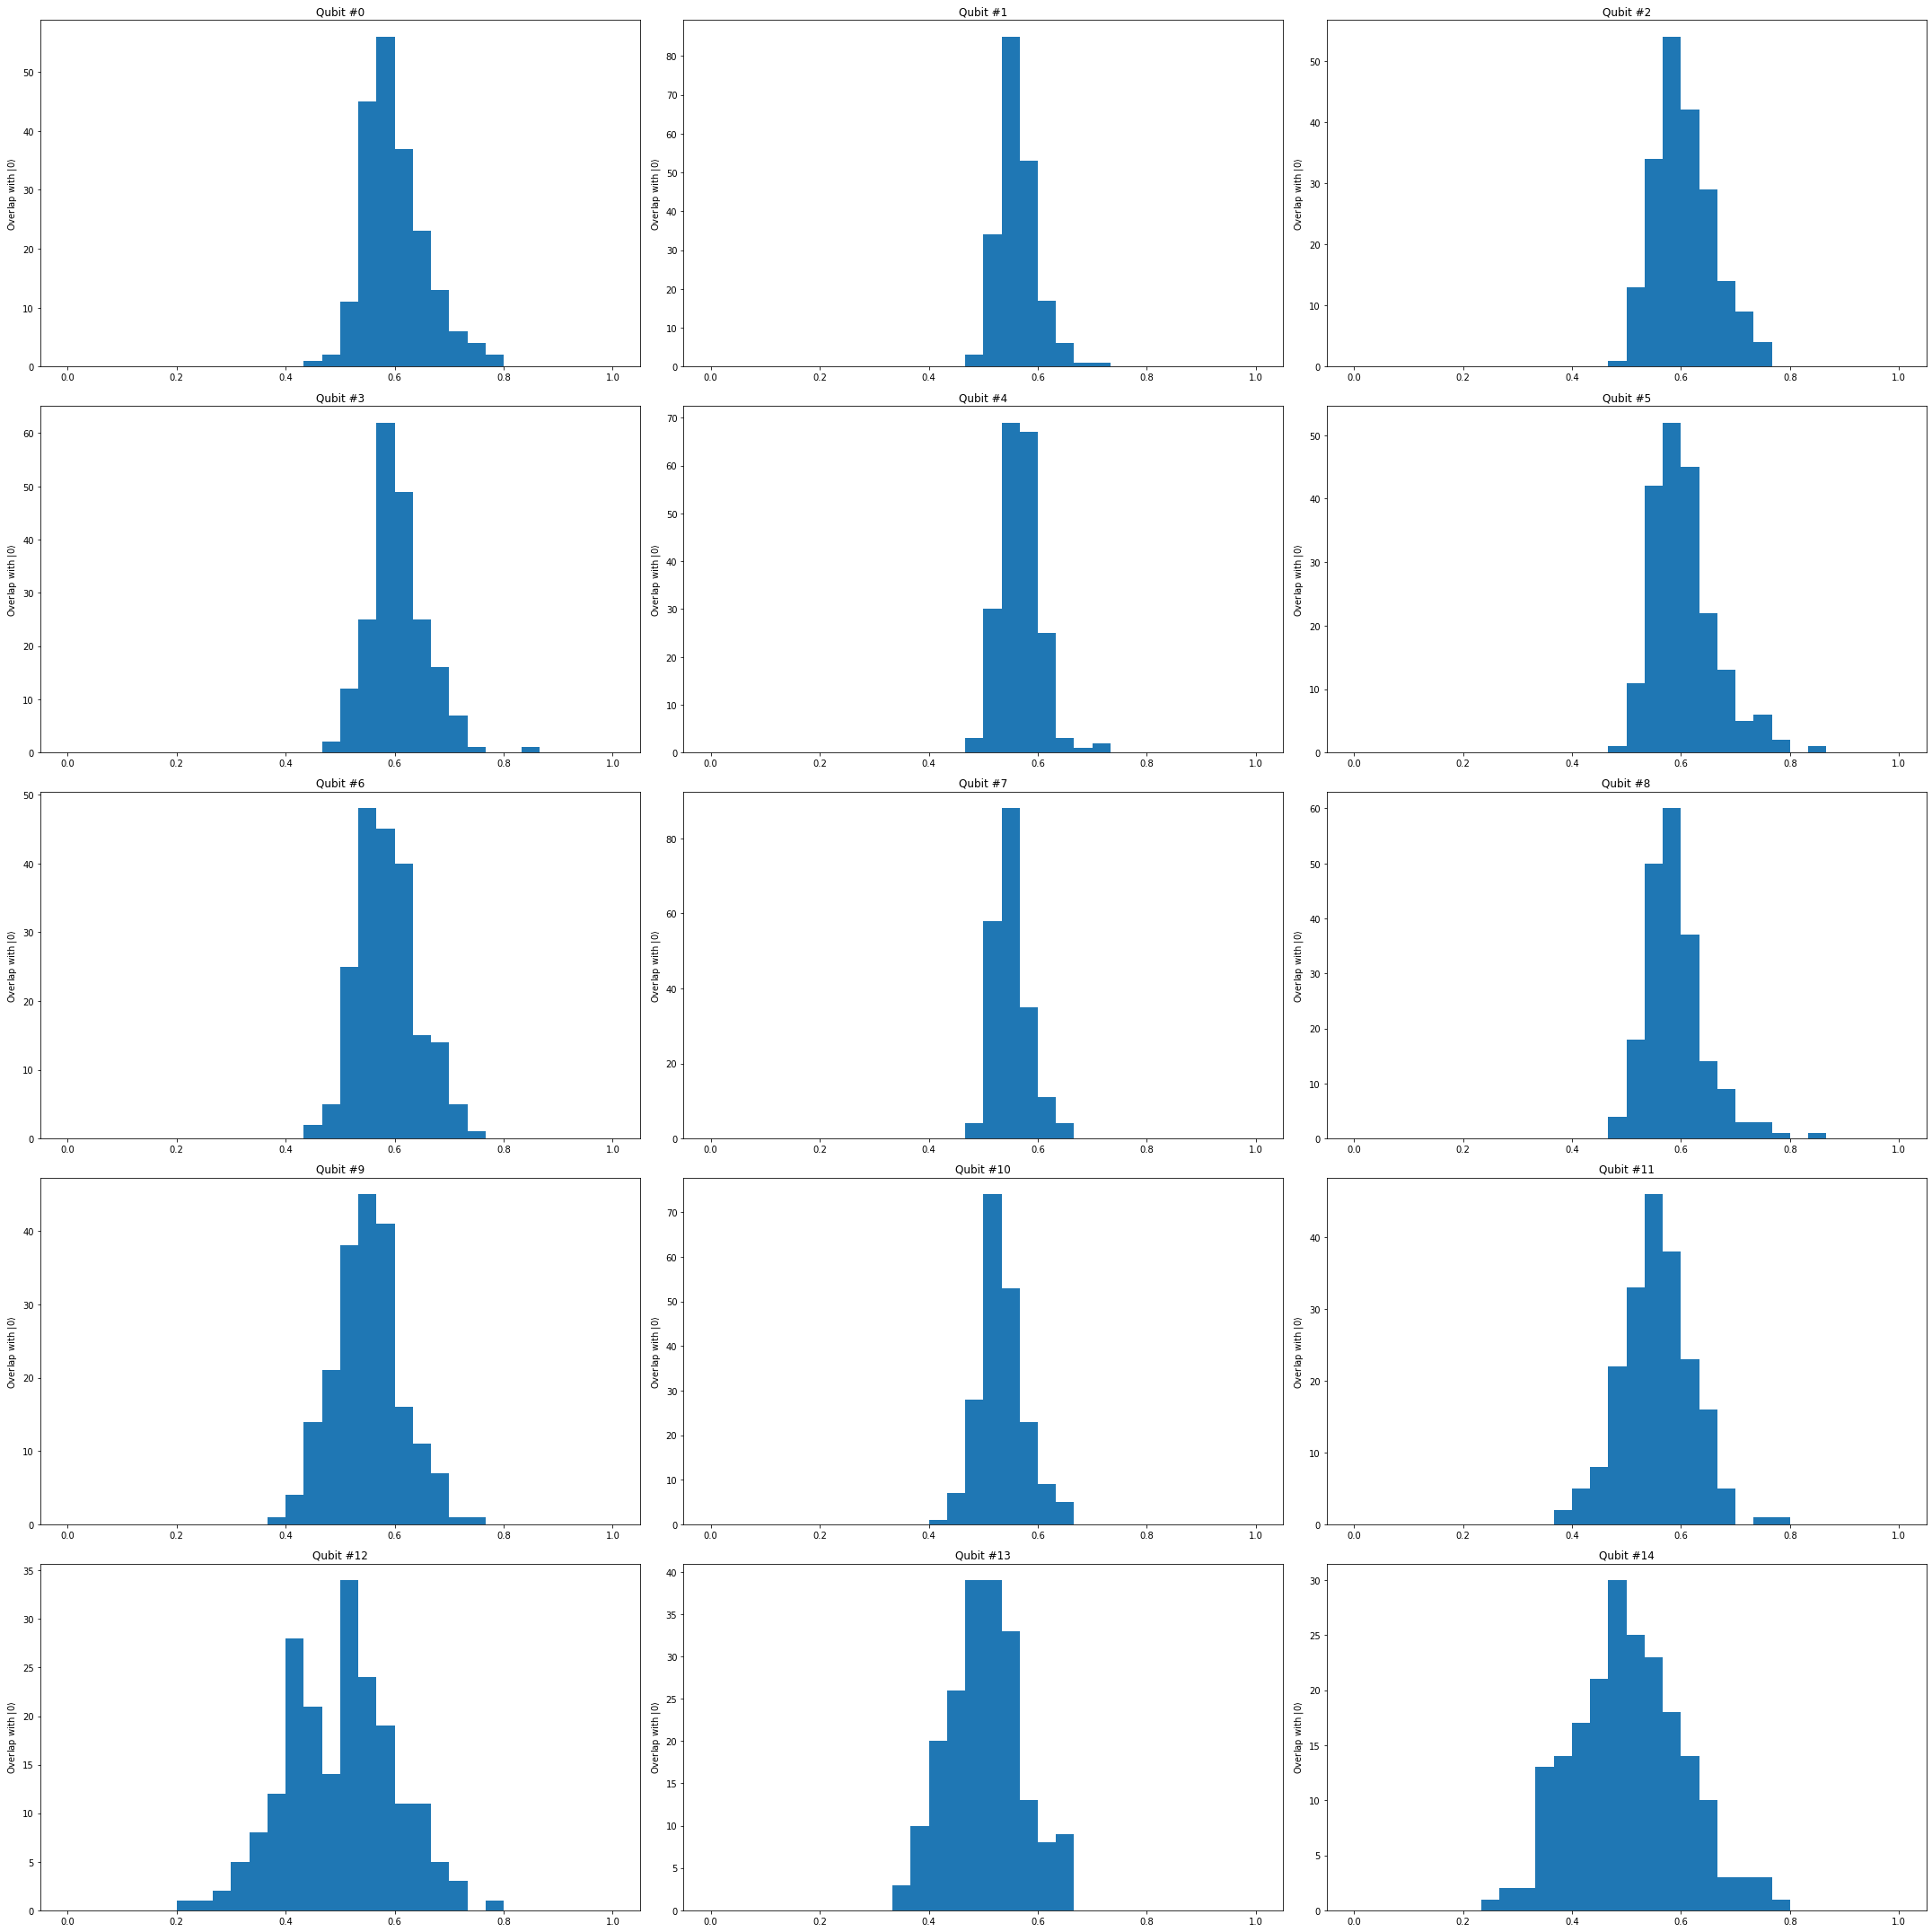

In [41]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(15):
    ax=fig.add_subplot(5,3, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


# April 6 update

## Eigenvalues

In [ ]:
# not the correct transfer matrix, but it still showcases something we can do
# so leaving the code here for futture reference

In [13]:
lad = cs.sample_ladder(50, all_same=True)
m = cs.compute_mps(50, lad)

m1 = m.copy(conjugate=False)
m2 = m.copy(conjugate=True)

all_nodes = []
for i in range(m.n_qubits):
    m1.out_edge(i) ^ m2.out_edge(i)

for i in range(m.n_qubits):
    all_nodes.append(m1.nodes[i] @ m2.nodes[i])

for n in all_nodes:
    s = n.tensor.shape
    tf = n.tensor.reshape((s[0]*s[1], s[2]*s[3]))
    eigs = sorted(np.real(np.linalg.eigvalsh(tf)))[::-1]
    print(np.log(np.abs(eigs[0] / eigs[1])))

0.5285122742372206
0.47199515878813914
0.5723967592571925
0.5466629203434705
0.5473081016815222
0.5480634787422419
0.5481345203451231
0.5481384808469045
0.548144909366025
0.5481466036459745
0.5481467518468497
0.5481467941890542
0.5481468141544878
0.5481468178319413
0.5481468183227229
0.5481468185031573
0.5481468185567574
0.5481468185657224
0.5481468185675881
0.5481468185682782
0.5481468185686619
0.5481468185693346
0.5481468185709939
0.5481468185753979
0.5481468185865326
0.548146818616697
0.5481468186912556
0.5481468188993117
0.5481468193942101
0.5481468208464043
0.5481468240853404
0.5481468343978226
0.5481468551504964
0.5481469303730863
0.5481470597671015
0.548147625356278
0.5481484003517473
0.5481529165449645
0.5481575056709992
0.548193781981543
0.5482254848379682
0.5485377841622019
0.5488777545783268
0.5510697560024254
0.5541953659143891
0.5779685387677612
0.5955571944599671
0.3374597136011611
0.7194115385412301
0.7660290414426252


In [18]:
# eigenvalues for the diagram showed
eigs = []
for _ in range(10000):
    g = cs.random_unitary_gate(2)
    g = cs.normalize_gate(g)

    t = np.tensordot(np.array([1,0]), g, axes=[0,0])
    o = np.tensordot(t, np.conj(t), axes=[1,1])
    o = np.transpose(o, (1, 2, 3, 0)).reshape(4,4)

    u = sorted(np.linalg.eigvalsh(o))
    eigs.append(u[1])

[]

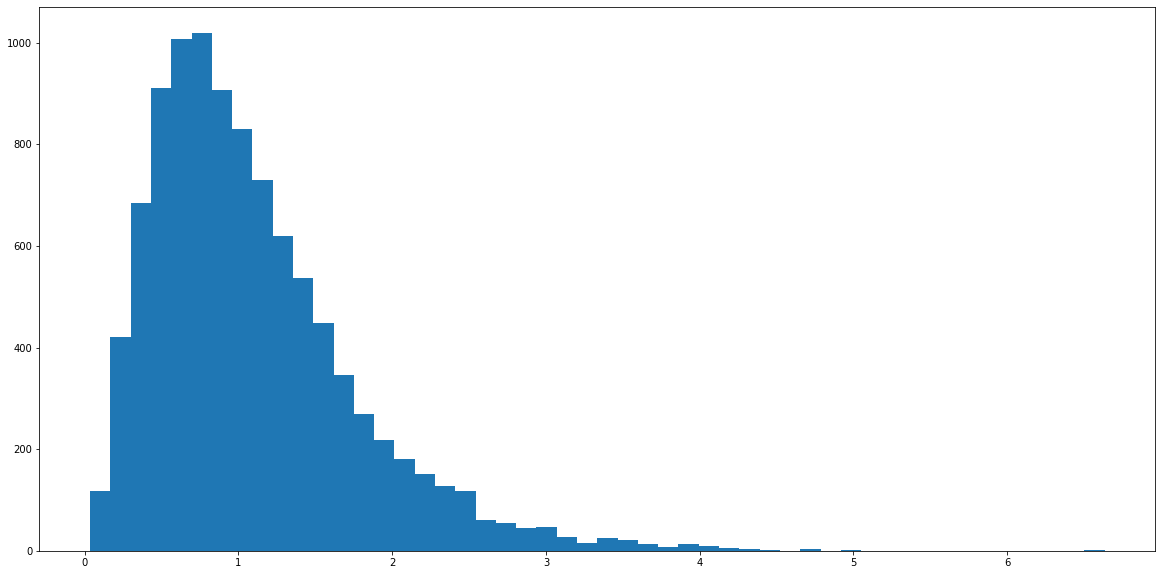

In [74]:
fig=plt.figure(figsize=(20, 10))
plt.hist(-np.log(eigs), bins = 50)
plt.plot()

In [181]:
um = cs.random_unitary_gate(2)

# u = tn.Node(np.zeros((2,3,4,5)), axis_names = ['a','b','c','d'])

In [194]:
def get_op_from_matrix(um):
    if len(um.shape) == 4:
        u = tn.Node(um, axis_names = ['a','b','c','d'])
    else:
        u = tn.Node(cs.normalize_gate(um), axis_names = ['a','b','c','d'])
    uc = tn.conj(u,axis_names = ['ac','bc','cc','dc'])

    u['c'] ^ uc['cc']
    # u[3] ^ uc[3]

    m = tn.Node(np.array([1,0]))
    m[0] ^ u['a']

    mc = tn.Node(np.array([1,0]))
    mc[0] ^ uc['ac']


    n = m @ u


    nc = mc @ uc

    t = n @ nc 
    return t

In [209]:
t = get_op_from_matrix(um)
t2 = get_op_from_matrix(np.array(np.matrix(um).H))

In [207]:
t = get_op_from_matrix(np.zeros((2,3,4,5)))
#t2 = get_op_from_matrix(np.array(np.matrix(um).H))

In [196]:
k = np.linalg.eig(np.transpose(t.tensor, (0,2,1,3)).reshape(4,4))[0]

ValueError: cannot reshape array of size 225 into shape (4,4)

In [172]:
k

array([ 1.        +2.77555756e-17j, -0.06136856+1.12197582e-01j,
        0.03349002-3.20051380e-17j, -0.06136856-1.12197582e-01j])

In [179]:
np.linalg.eig(np.transpose(t.tensor, (0,2,1,3)).reshape(4,4))[1][:,0]

array([7.07106781e-01+0.00000000e+00j, 1.47019139e-16+1.57153151e-16j,
       8.20001441e-17-1.64235403e-16j, 7.07106781e-01+1.60287661e-16j])

In [135]:
from itertools import permutations

In [208]:
bad_ps = []
for p in permutations(range(4)):
    tp = np.transpose(t.tensor, p)
    if tp.shape[0]*tp.shape[1] != tp.shape[2]*tp.shape[3]:
        continue
    bad_ps.append(p)

In [203]:
t = get_op_from_matrix(um)

In [214]:
for p in permutations(range(4)):
    if p in bad_ps:
        continue
    tp = np.transpose(t.tensor, p)
    if tp.shape[0]*tp.shape[1] != tp.shape[2]*tp.shape[3]:
        continue
        
    k = np.linalg.eig(tp.reshape(tp.shape[0]*tp.shape[1], tp.shape[2]*tp.shape[3]))[0]
    

    print(p)
    print(sorted(np.abs(k - 1)))
    print(sorted(np.real(k)))
    
    print(np.max(np.abs(np.imag(k))))

(0, 2, 1, 3)
[5.568705335435211e-16, 0.4172485989704313, 1.3394369278339915, 1.3394369278339915]
[-0.2951264603705627, -0.29512646037056267, 0.5827514010295687, 0.9999999999999994]
0.34167050691181755
(0, 2, 3, 1)
[9.09180472805593e-16, 0.8566385644754891, 0.8566385644754891, 1.4503720323911051]
[-0.450372032391105, 0.264961814715791, 0.2649618147157912, 0.9999999999999991]
0.4399414691987152
(1, 3, 0, 2)
[2.220868982118629e-16, 0.41724859897043143, 1.3394369278339908, 1.3394369278339908]
[-0.29512646037056245, -0.29512646037056234, 0.5827514010295686, 1.0000000000000002]
0.3416705069118171
(1, 3, 2, 0)
[9.012017851447574e-16, 0.8566385644754893, 0.8566385644754894, 1.450372032391105]
[-0.4503720323911049, 0.2649618147157908, 0.2649618147157909, 0.9999999999999991]
0.43994146919871474
(2, 0, 1, 3)
[9.09180472805593e-16, 0.8566385644754891, 0.8566385644754891, 1.4503720323911051]
[-0.450372032391105, 0.264961814715791, 0.2649618147157912, 0.9999999999999991]
0.4399414691987152
(2, 0, 3,

(array([ 1.46956321e+00-9.58250591e-17j, -1.65029381e-16-2.94547846e-18j,
         5.30436792e-01+1.62602286e-18j,  2.61496320e-17-1.06488662e-17j]),
 array([[ 0.59492631+0.j        ,  0.75489401+0.j        ,
          0.19331288+0.19704787j, -0.0788701 +0.02779383j],
        [-0.3621982 -0.23007681j,  0.09914945+0.37121746j,
          0.72749375+0.j        ,  0.19547565+0.26337941j],
        [ 0.32991819+0.38225208j, -0.38491075-0.27433004j,
          0.2917644 +0.19227813j,  0.67833912+0.j        ],
        [-0.17808519+0.41864402j, -0.02873591-0.24137732j,
          0.49669125+0.16048543j, -0.55387967-0.34423962j]]))

In [27]:
u = tn.Node((cs.random_unitary_gate(2)));u

Node
(
name : '__unnamed_node__',
tensor : 
array([[-0.31336717-0.7183624j ,  0.39215201-0.43795156j,
         0.06270592+0.17893783j, -0.03512615-0.05465421j],
       [ 0.02682241+0.04548932j, -0.10718887-0.30297473j,
        -0.72615151-0.09398766j,  0.3688418 -0.47090782j],
       [-0.14045359-0.42761503j, -0.36968653+0.25600526j,
        -0.46217057-0.3342869j , -0.38740326+0.34609347j],
       [-0.39395818+0.15869117j,  0.45164804+0.38070895j,
        -0.03697993-0.31812363j, -0.34127629-0.50164643j]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
] 
)

In [28]:
uc = tn.conj(u);uc

Node
(
name : '__unnamed_node__',
tensor : 
array([[-0.31336717+0.7183624j ,  0.39215201+0.43795156j,
         0.06270592-0.17893783j, -0.03512615+0.05465421j],
       [ 0.02682241-0.04548932j, -0.10718887+0.30297473j,
        -0.72615151+0.09398766j,  0.3688418 +0.47090782j],
       [-0.14045359+0.42761503j, -0.36968653-0.25600526j,
        -0.46217057+0.3342869j , -0.38740326-0.34609347j],
       [-0.39395818-0.15869117j,  0.45164804-0.38070895j,
        -0.03697993+0.31812363j, -0.34127629+0.50164643j]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
] 
)

In [29]:
u[1] ^ uc[1]


Edge('__unnamed_node__'[1] -> '__unnamed_node__'[1] )

In [30]:
n = u@uc;n

Node
(
name : '__unnamed_node__',
tensor : 
array([[ 1.00000000e+00+0.00000000e+00j,  5.55111512e-17-5.55111512e-17j,
        -6.93889390e-17+0.00000000e+00j,  1.66533454e-16+1.38777878e-17j],
       [ 5.55111512e-17+5.55111512e-17j,  1.00000000e+00+0.00000000e+00j,
        -1.38777878e-16+0.00000000e+00j,  1.38777878e-16+2.08166817e-17j],
       [-6.93889390e-17+0.00000000e+00j, -1.38777878e-16+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j, -1.11022302e-16-2.77555756e-17j],
       [ 1.66533454e-16-1.38777878e-17j,  1.38777878e-16-2.08166817e-17j,
        -1.11022302e-16+2.77555756e-17j,  1.00000000e+00+0.00000000e+00j]]),
edges : 
[
Edge(Dangling Edge)[0] 
, 
Edge(Dangling Edge)[1] 
] 
)

In [31]:
n.tensor

array([[ 1.00000000e+00+0.00000000e+00j,  5.55111512e-17-5.55111512e-17j,
        -6.93889390e-17+0.00000000e+00j,  1.66533454e-16+1.38777878e-17j],
       [ 5.55111512e-17+5.55111512e-17j,  1.00000000e+00+0.00000000e+00j,
        -1.38777878e-16+0.00000000e+00j,  1.38777878e-16+2.08166817e-17j],
       [-6.93889390e-17+0.00000000e+00j, -1.38777878e-16+0.00000000e+00j,
         1.00000000e+00+0.00000000e+00j, -1.11022302e-16-2.77555756e-17j],
       [ 1.66533454e-16-1.38777878e-17j,  1.38777878e-16-2.08166817e-17j,
        -1.11022302e-16+2.77555756e-17j,  1.00000000e+00+0.00000000e+00j]])

In [32]:
np.array(np.matrix(n.tensor).H)

array([[ 1.00000000e+00-0.00000000e+00j,  5.55111512e-17-5.55111512e-17j,
        -6.93889390e-17-0.00000000e+00j,  1.66533454e-16+1.38777878e-17j],
       [ 5.55111512e-17+5.55111512e-17j,  1.00000000e+00-0.00000000e+00j,
        -1.38777878e-16-0.00000000e+00j,  1.38777878e-16+2.08166817e-17j],
       [-6.93889390e-17-0.00000000e+00j, -1.38777878e-16-0.00000000e+00j,
         1.00000000e+00-0.00000000e+00j, -1.11022302e-16-2.77555756e-17j],
       [ 1.66533454e-16-1.38777878e-17j,  1.38777878e-16-2.08166817e-17j,
        -1.11022302e-16+2.77555756e-17j,  1.00000000e+00-0.00000000e+00j]])

# Quick benchmark

In [ ]:
# Similar code to above, but with the new definitions for sampling

In [49]:
ps = []
for x in tqdm(range(2000)):
    ps.append(cs.sample_all_qubits_faster(50))
ps = np.array(ps)

In [86]:
# when things are not the same
ps_nosame = []
for x in tqdm(range(2000)):
    ps_nosame.append(cs.sample_all_qubits_faster(50, all_same=False))
ps_nosame = np.array(ps_nosame)

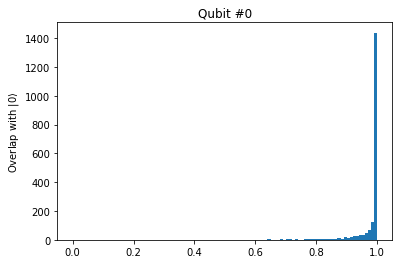

In [50]:
plt.hist(ps[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.ylabel(r"Overlap with $|0\rangle$")
plt.show()

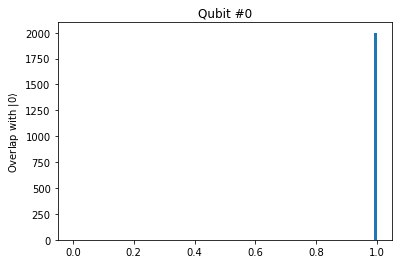

In [87]:
plt.hist(ps_nosame[:,0], bins = 100, range=(0,1))
plt.title(f"Qubit #{0}")
plt.ylabel(r"Overlap with $|0\rangle$")
plt.show()

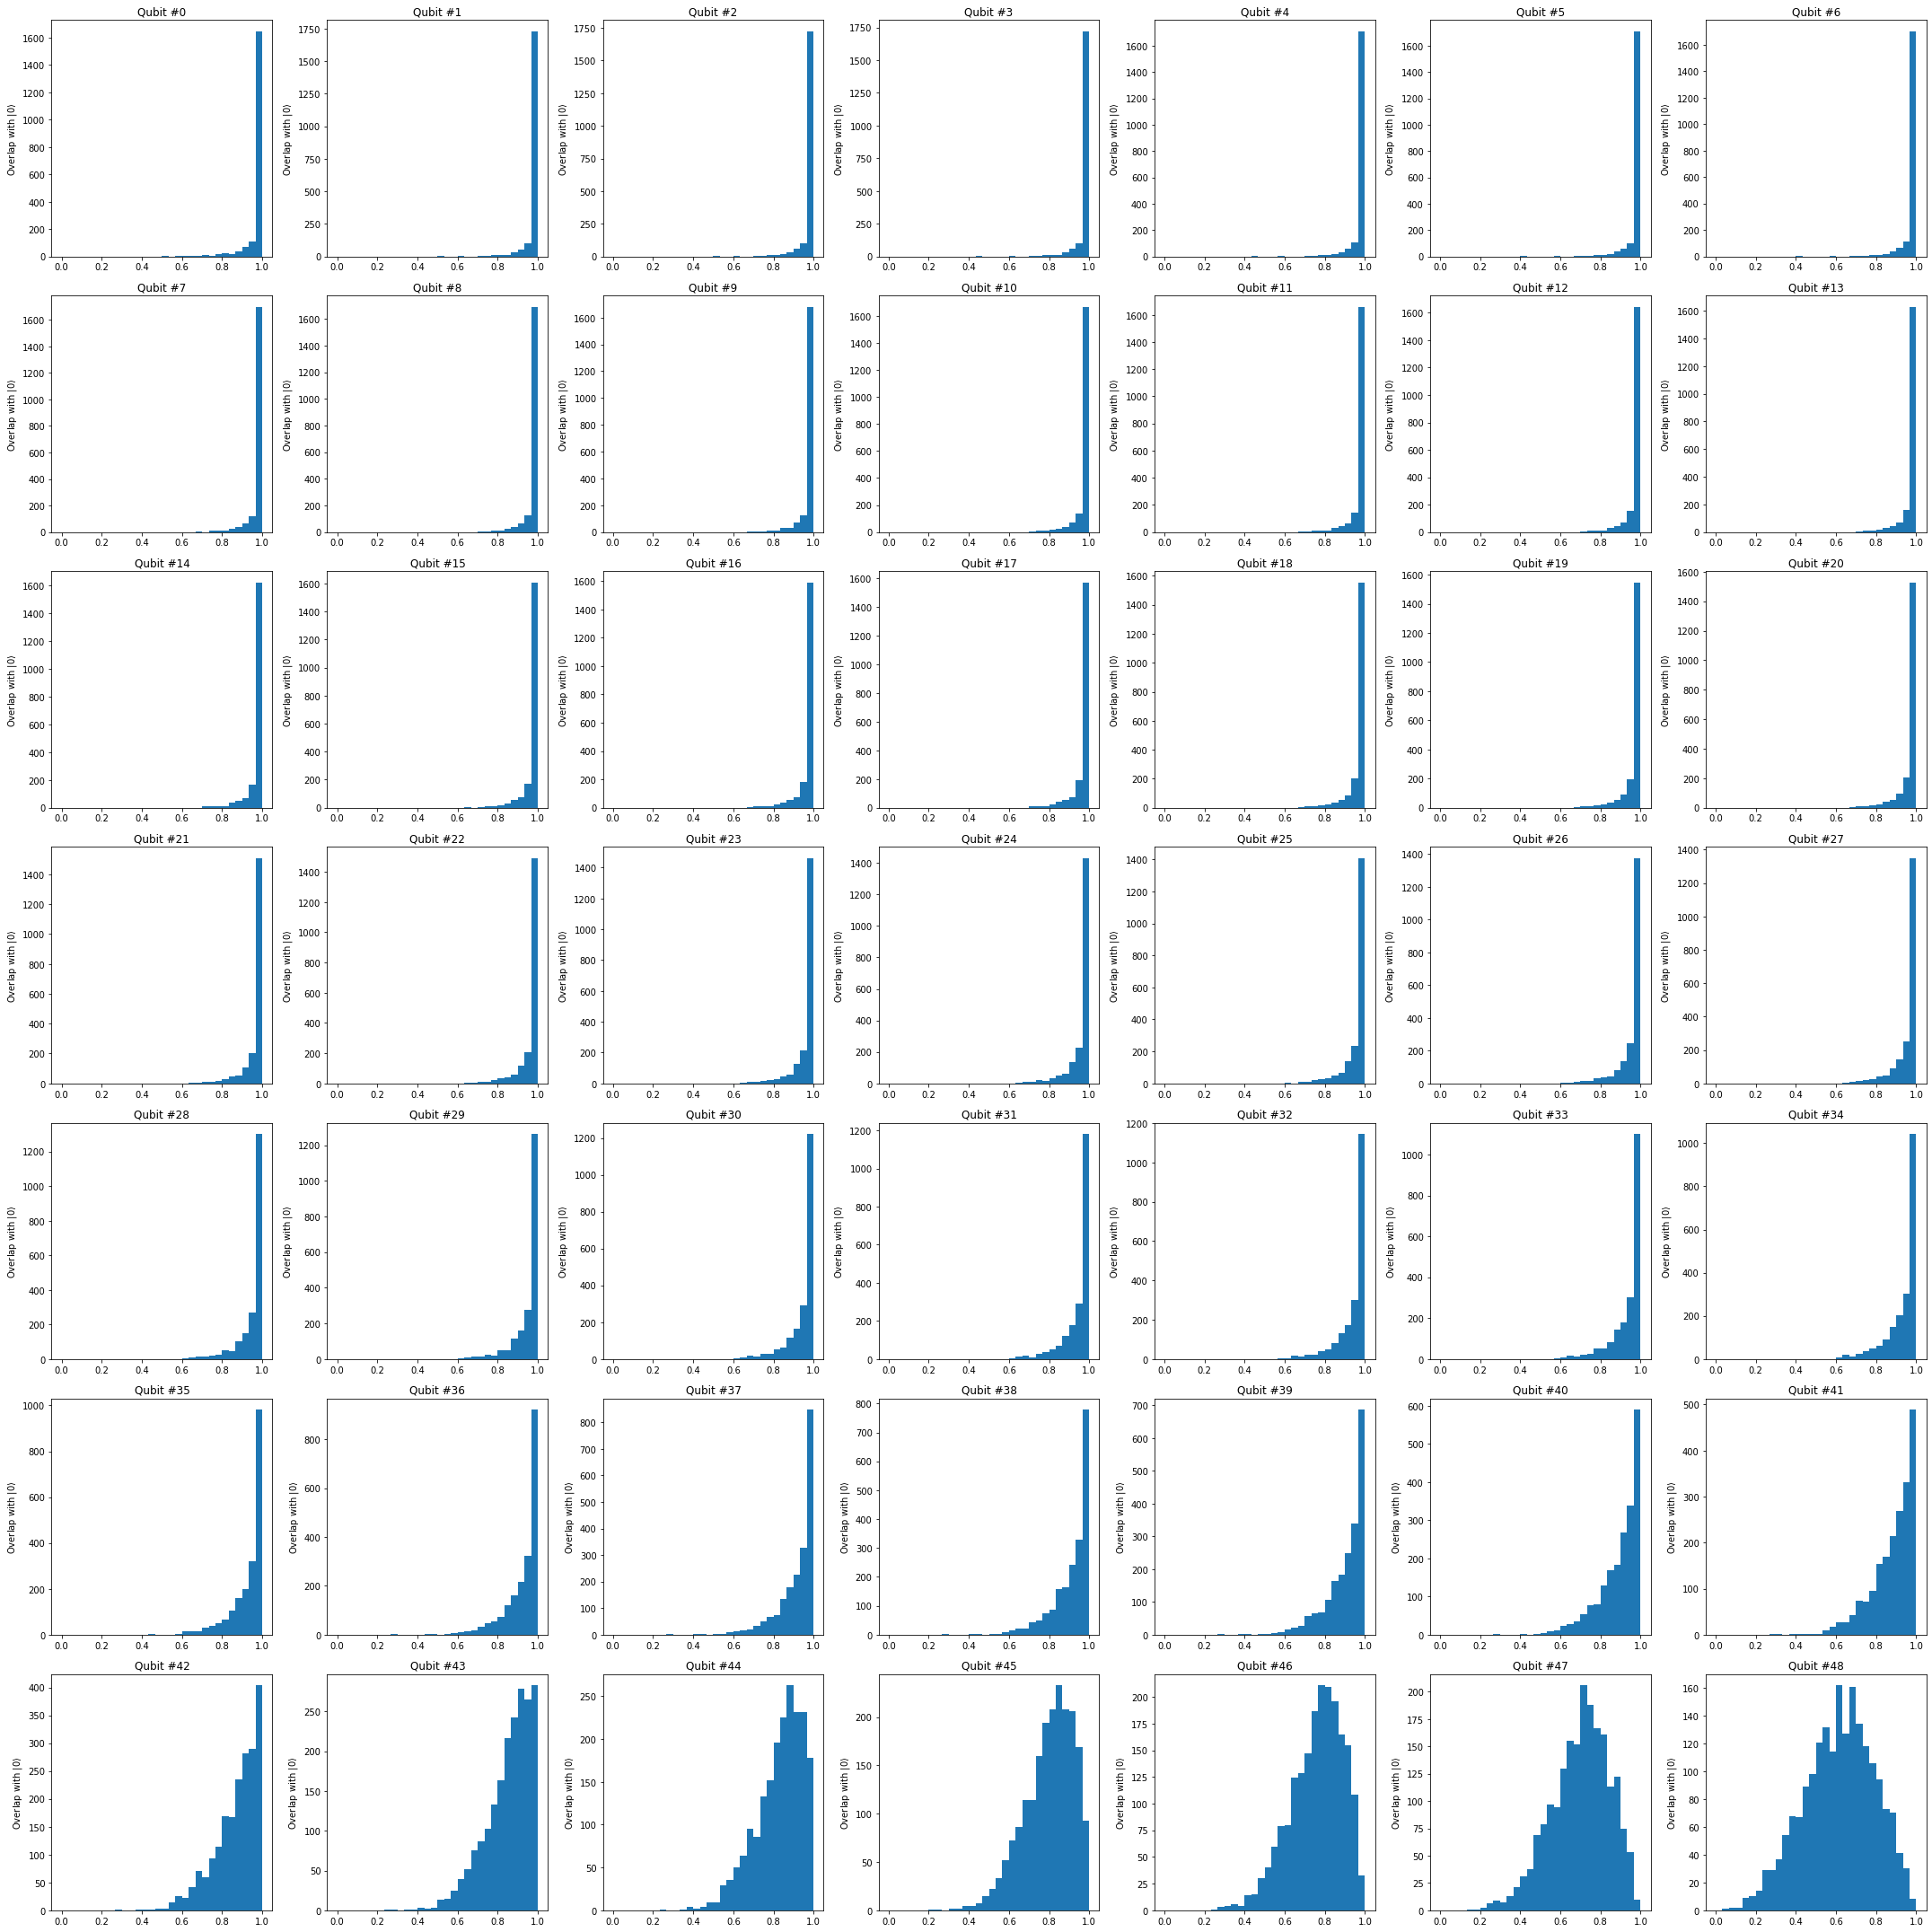

In [51]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


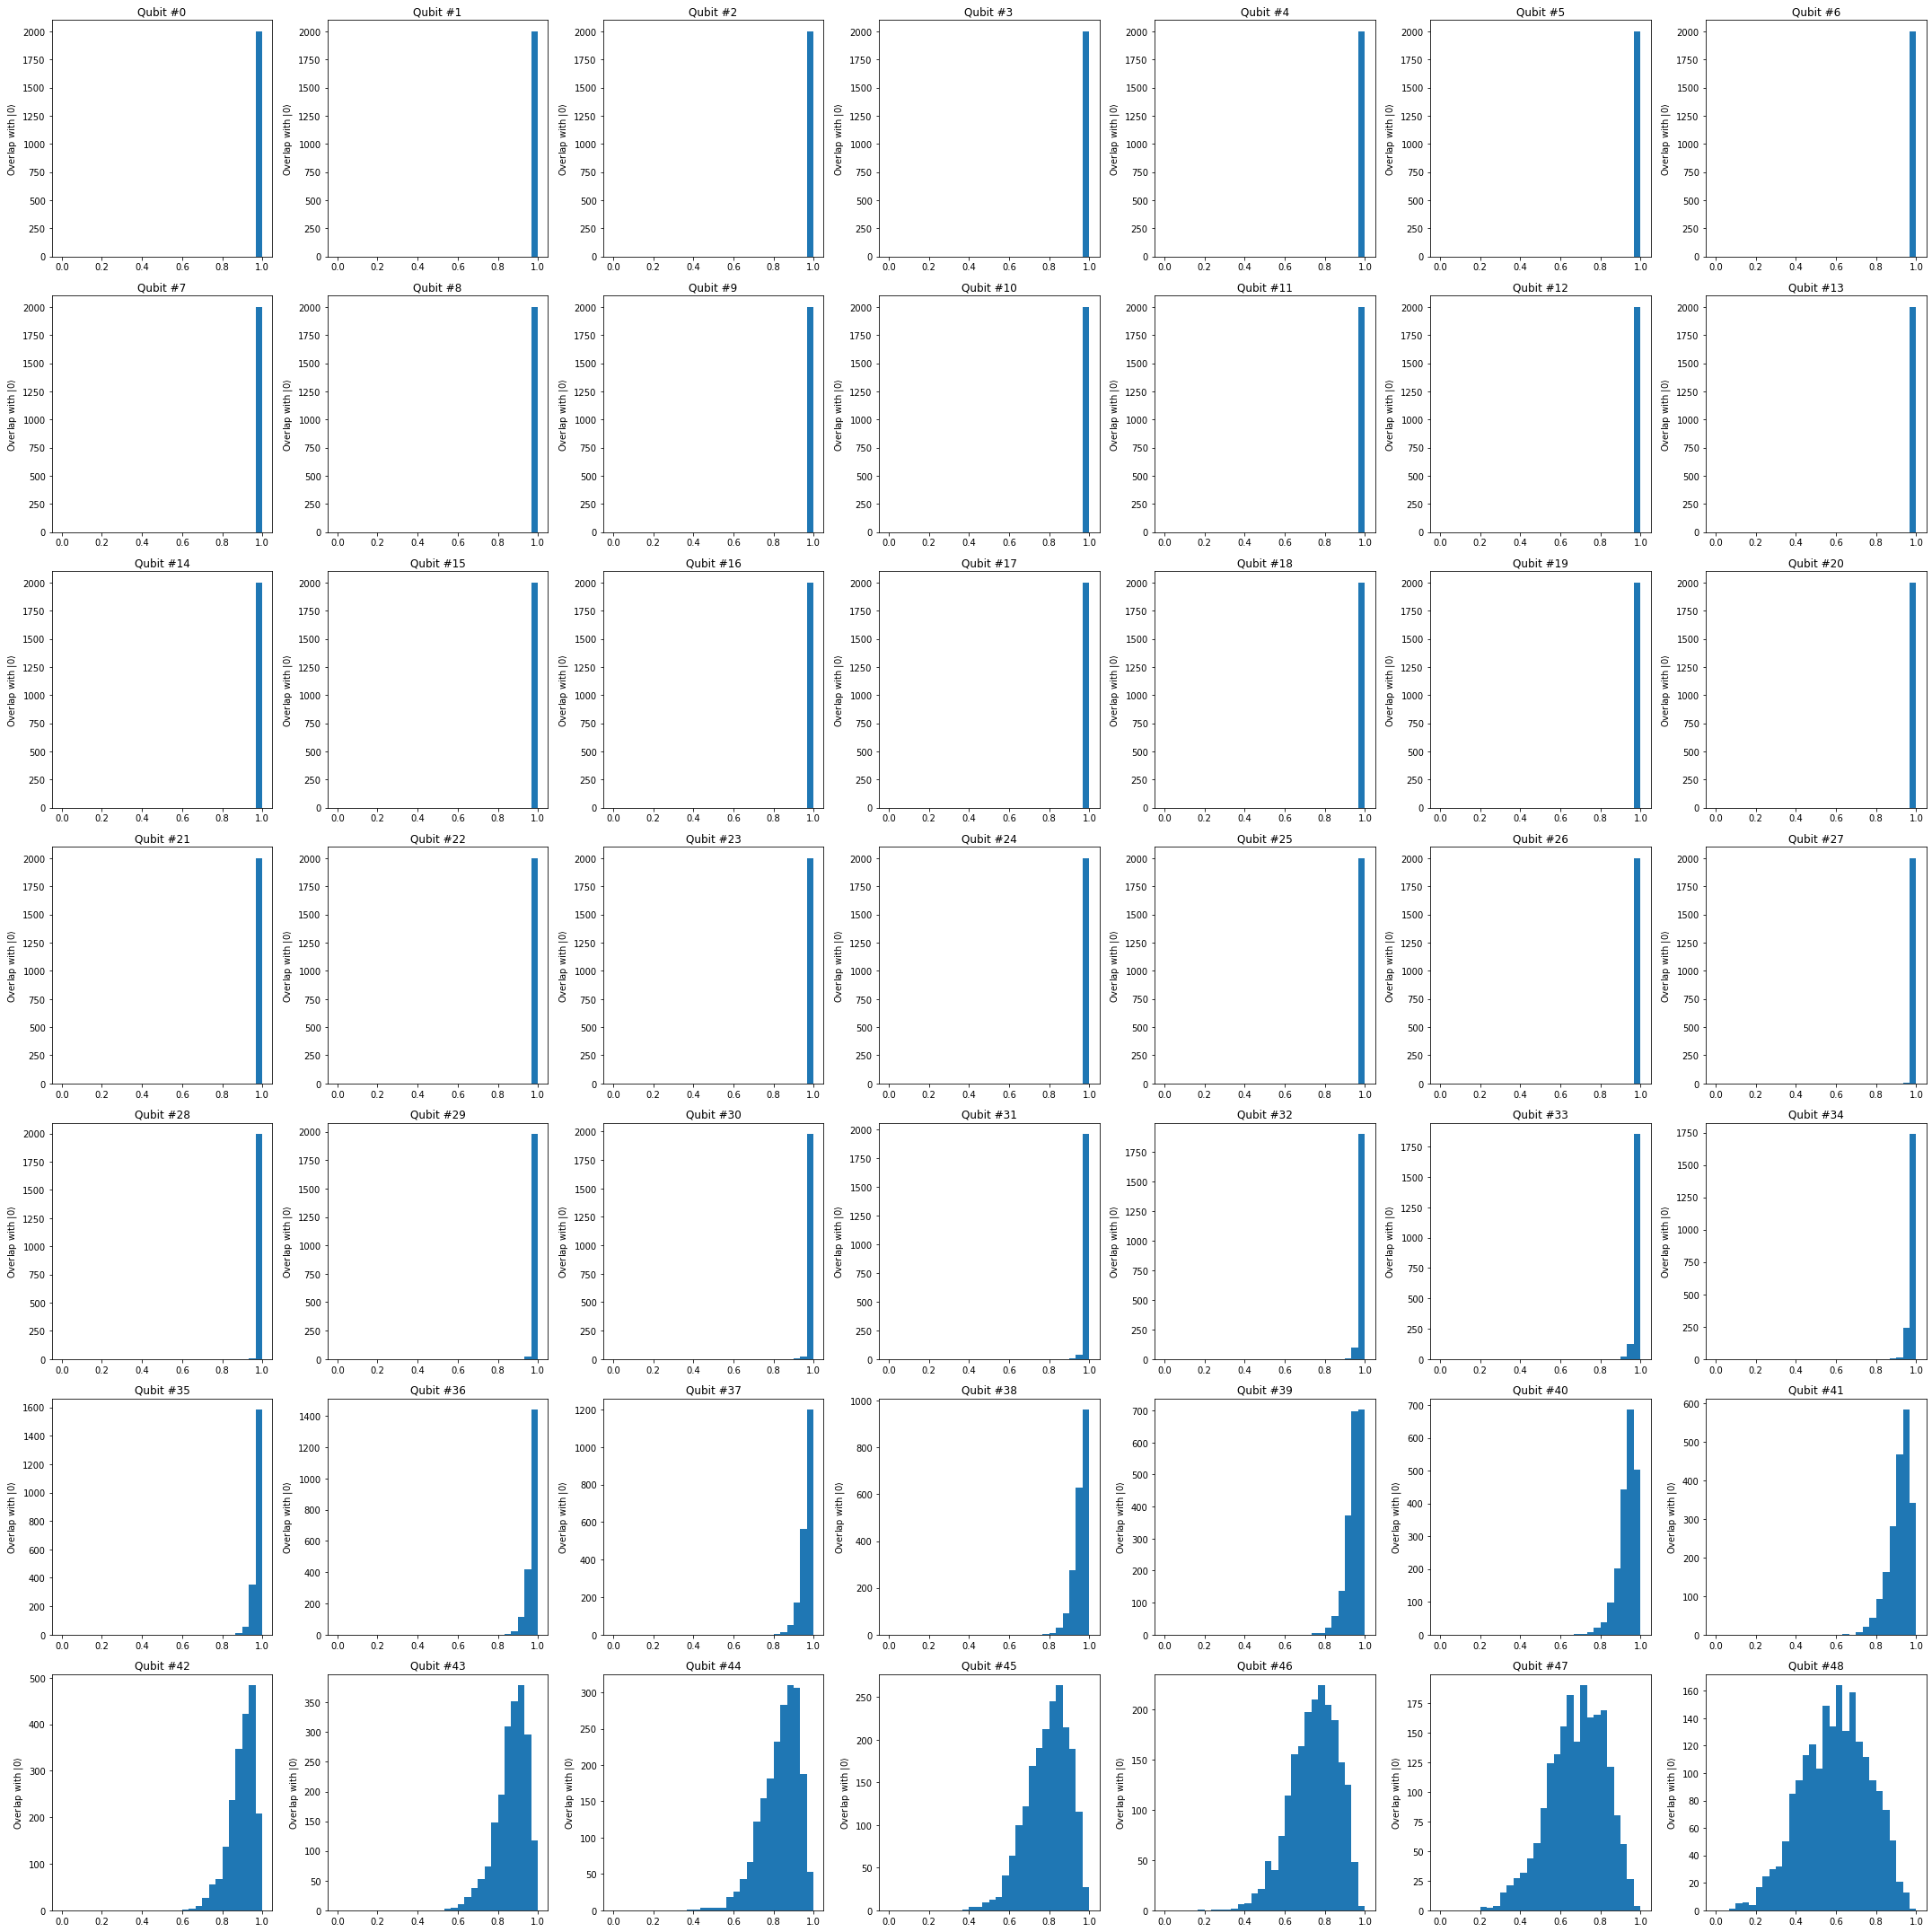

In [88]:
fig=plt.figure(figsize=(30, 30))
t = 0
for i in range(49):
    ax=fig.add_subplot(7,7, i+1)
    ax.hist(ps_nosame[:, i], bins = 30, range=(0,1))
    ax.set_title(f"Qubit #{i}")
    ax.set_ylabel(r"Overlap with $|0\rangle$")
fig.tight_layout()  # Improves appearance a bit.
# plt.savefig('concurrences_bigger.png')
plt.show()


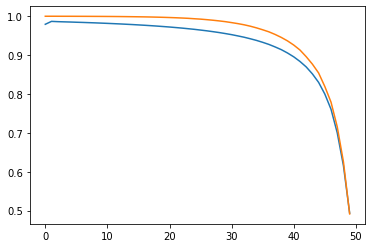

In [89]:
#blue is mean, orange is median
plt.plot(np.mean(ps,axis=0))
plt.plot(np.median(ps,axis=0))
plt.show()

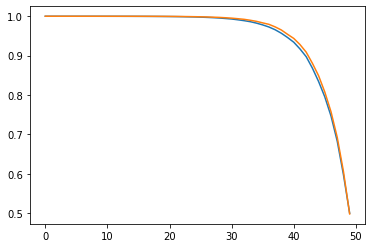

In [90]:
plt.plot(np.mean(ps_nosame,axis=0))
plt.plot(np.median(ps_nosame,axis=0))
plt.show()

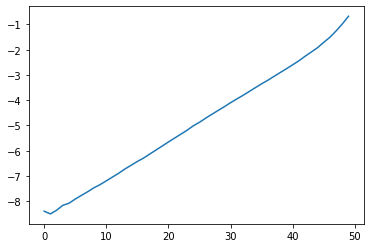

In [62]:
plt.plot(np.log(1-np.median(ps, axis=0)))
plt.show()

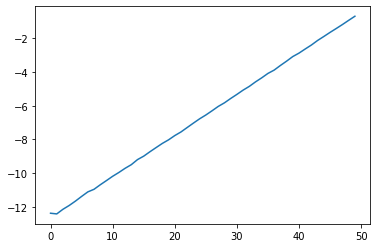

In [91]:
plt.plot(np.log(1-np.median(ps_nosame, axis=0)))
plt.show()

In [69]:
# Fitting the exponential
from sklearn.linear_model import LinearRegression 

In [78]:
lr = LinearRegression()
lr.fit(np.array([np.arange(50)]).T, np.log(1-np.median(ps, axis=0)))
lr.coef_[0], lr.intercept_

(0.15526394603650606, -8.72304926423791)

In [81]:
#R2
lr.score(np.array([np.arange(50)]).T, np.log(1-np.median(ps, axis=0)))

0.9979074664890614

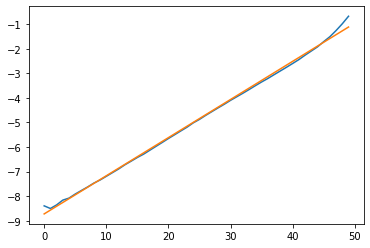

In [82]:
plt.plot(np.log(1-np.median(ps, axis=0)))
plt.plot(np.arange(50)*lr.coef_[0] + lr.intercept_)

(Recall that the 0-qubit is the closest one, so we have to reverse to measure distance).
So we have that if $o_k$ is the median overlap of the $k$-th qubit, then $-8.72304926423791 + (50-k)\cdot 0.15526394603650606 \approx \log(1-o_k)$. 
That is, 

$$1-o_k \approx e^{-0.959851962 - k\cdot 0.15526394603650606}$$

$$o_k \approx 1- e^{-0.959851962 - k\cdot 0.15526394603650606}$$

$$o_k \approx 1- 0.382949573 \cdot (1.1679662)^{-k}$$


In [92]:
lr = LinearRegression()
lr.fit(np.array([np.arange(50)]).T, np.log(1-np.median(ps_nosame, axis=0)))
lr.coef_[0], lr.intercept_

(0.2434308164409914, -12.619907669096829)

In [93]:
#R2
lr.score(np.array([np.arange(50)]).T, np.log(1-np.median(ps_nosame, axis=0)))

0.9998703388860332

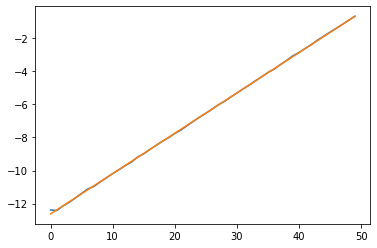

In [94]:
plt.plot(np.log(1-np.median(ps_nosame, axis=0)))
plt.plot(np.arange(50)*lr.coef_[0] + lr.intercept_)

(Recall that the 0-qubit is the closest one, so we have to reverse to measure distance).
So we have that if $o_k$ is the median overlap of the $k$-th qubit, then $-12.619907669096829 + (50-k)\cdot 0.2434308164409914 \approx \log(1-o_k)$. 
That is, 
$$1-o_k \approx e^{-0.448366847 - k\cdot 0.2434308164409914}$$

$$o_k \approx 1- e^{-0.448366847 - k\cdot 0.2434308164409914}$$

$$o_k \approx 1- 0.638670347\cdot (1.27561806)^{-k}$$


In [80]:
top3 = {}
for i in range(5, 30):
    print(i)
    top3[i] = [cs.sample_top_k(i) for _ in tqdm(range(100))]

5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29
